# 오픈소스 개발 프로젝트 

### 수면과 건강의 관련성 분석

* 수면 양의 평균(7.13)과 중앙값(7.2)을 고려하여 7.2시간 이상과 미만을 기준


##### <수면의 양과 수면의 질>

In [1]:
import pandas as pd

file_path = 'Sleep_health_and_lifestyle_dataset_1.csv'  
df = pd.read_csv(file_path)
data = df

df_more_than_7_2_hours = df[df['Sleep Duration'] >= 7.2]
df_less_than_7_2_hours = df[df['Sleep Duration'] < 7.2]

stats_more_than_7_2_hours = df_more_than_7_2_hours['Quality of Sleep'].describe(percentiles=[.25, .75])
stats_less_than_7_2_hours = df_less_than_7_2_hours['Quality of Sleep'].describe(percentiles=[.25, .75])

stats_df = pd.DataFrame({
    'Sleep Duration': ['>= 7.2h', '<  7.2h'],
    'Mean': [stats_more_than_7_2_hours['mean'], stats_less_than_7_2_hours['mean']],
    '25%': [stats_more_than_7_2_hours['25%'], stats_less_than_7_2_hours['25%']],
    '75%': [stats_more_than_7_2_hours['75%'], stats_less_than_7_2_hours['75%']]
})

stats_df.set_index('Sleep Duration', inplace=True)

stats_df.head()

,Mean,25%,75%
Sleep Duration,,,
>= 7.2h,8.175000,8.0,9.0
< 7.2h,6.321839,6.0,7.0


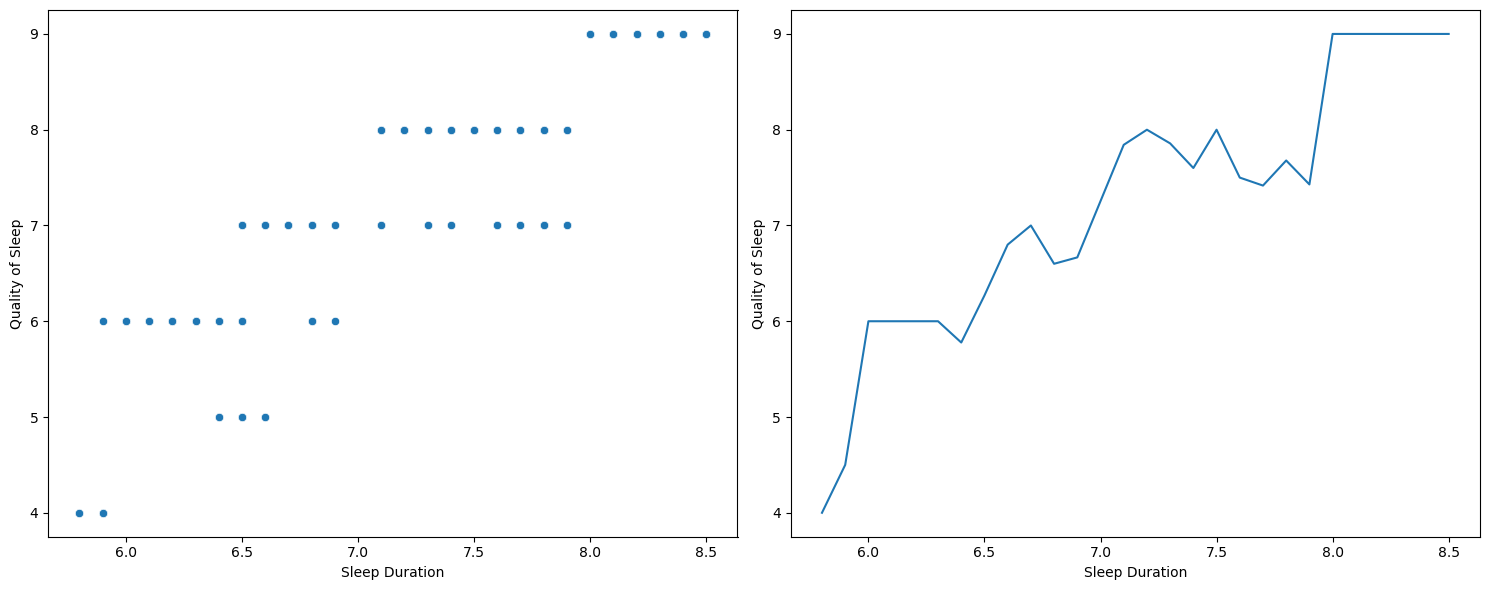

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(data=data, x="Sleep Duration", y="Quality of Sleep", ax=axes[0])
grouped_data = data.groupby("Sleep Duration")["Quality of Sleep"].mean().reset_index()
sns.lineplot(data=grouped_data, x="Sleep Duration", y="Quality of Sleep", ax=axes[1])

plt.tight_layout()

##### <수면의 양과 스트레스 레벨>

In [3]:
stats_more_than_7_2_hours = df_more_than_7_2_hours['Stress Level'].describe(percentiles=[.25, .75])
stats_less_than_7_2_hours = df_less_than_7_2_hours['Stress Level'].describe(percentiles=[.25, .75])

stats_df = pd.DataFrame({
    'Sleep Duration': ['>= 7.2h', '<  7.2h'],
    'Mean': [stats_more_than_7_2_hours['mean'], stats_less_than_7_2_hours['mean']],
    '25%': [stats_more_than_7_2_hours['25%'], stats_less_than_7_2_hours['25%']],
    '75%': [stats_more_than_7_2_hours['75%'], stats_less_than_7_2_hours['75%']]
})

stats_df.set_index('Sleep Duration', inplace=True)

stats_df.head()

,Mean,25%,75%
Sleep Duration,,,
>= 7.2h,4.305000,3.00,5.0
< 7.2h,6.626437,5.25,8.0


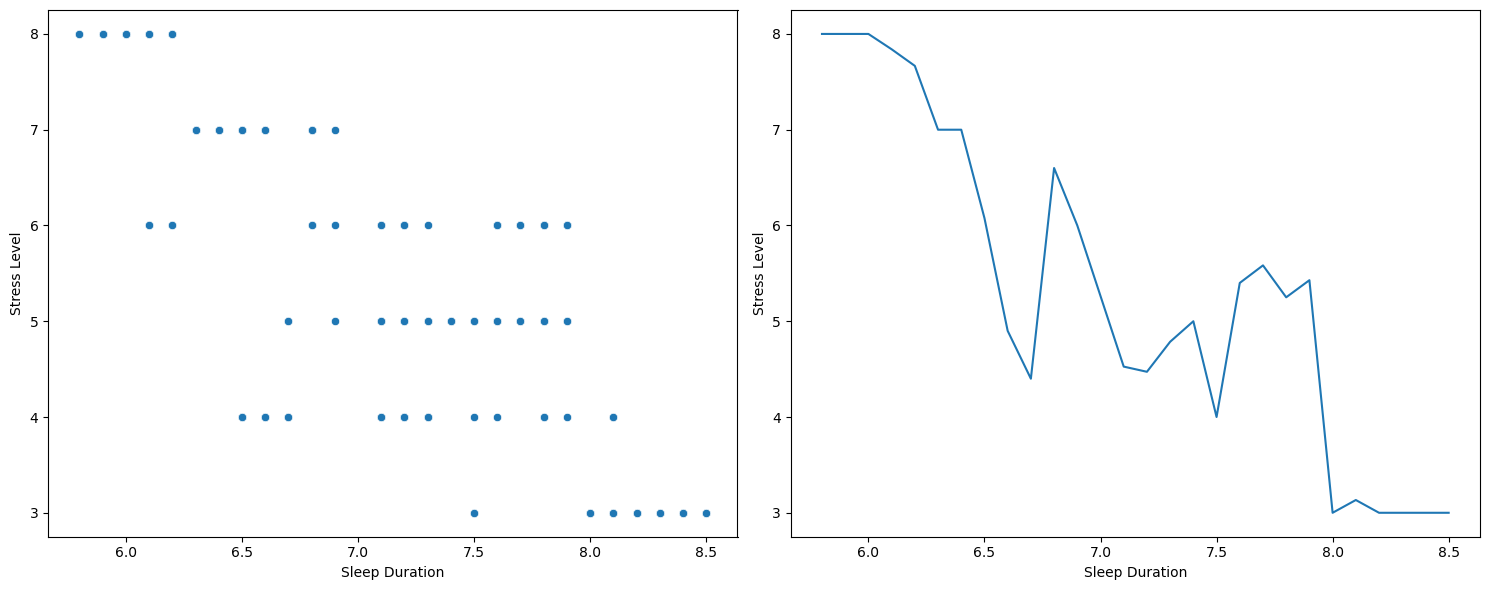

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(data=data, x="Sleep Duration", y="Stress Level", ax=axes[0])
grouped_data_stress = data.groupby("Sleep Duration")["Stress Level"].mean().reset_index()
sns.lineplot(data=grouped_data_stress, x="Sleep Duration", y="Stress Level", ax=axes[1])

plt.tight_layout()

##### <수면의 양과 심박수>

In [5]:
stats_more_than_7_2_hours = df_more_than_7_2_hours['Heart Rate'].describe(percentiles=[.25, .75])
stats_less_than_7_2_hours = df_less_than_7_2_hours['Heart Rate'].describe(percentiles=[.25, .75])

stats_df = pd.DataFrame({
    'Sleep Duration': ['>= 7.2h', '<  7.2h'],
    'Mean': [stats_more_than_7_2_hours['mean'], stats_less_than_7_2_hours['mean']],
    '25%': [stats_more_than_7_2_hours['25%'], stats_less_than_7_2_hours['25%']],
    '75%': [stats_more_than_7_2_hours['75%'], stats_less_than_7_2_hours['75%']]
})

stats_df.set_index('Sleep Duration', inplace=True)

stats_df.head()

,Mean,25%,75%
Sleep Duration,,,
>= 7.2h,68.67500,68.00,70.0
< 7.2h,71.87931,69.25,75.0


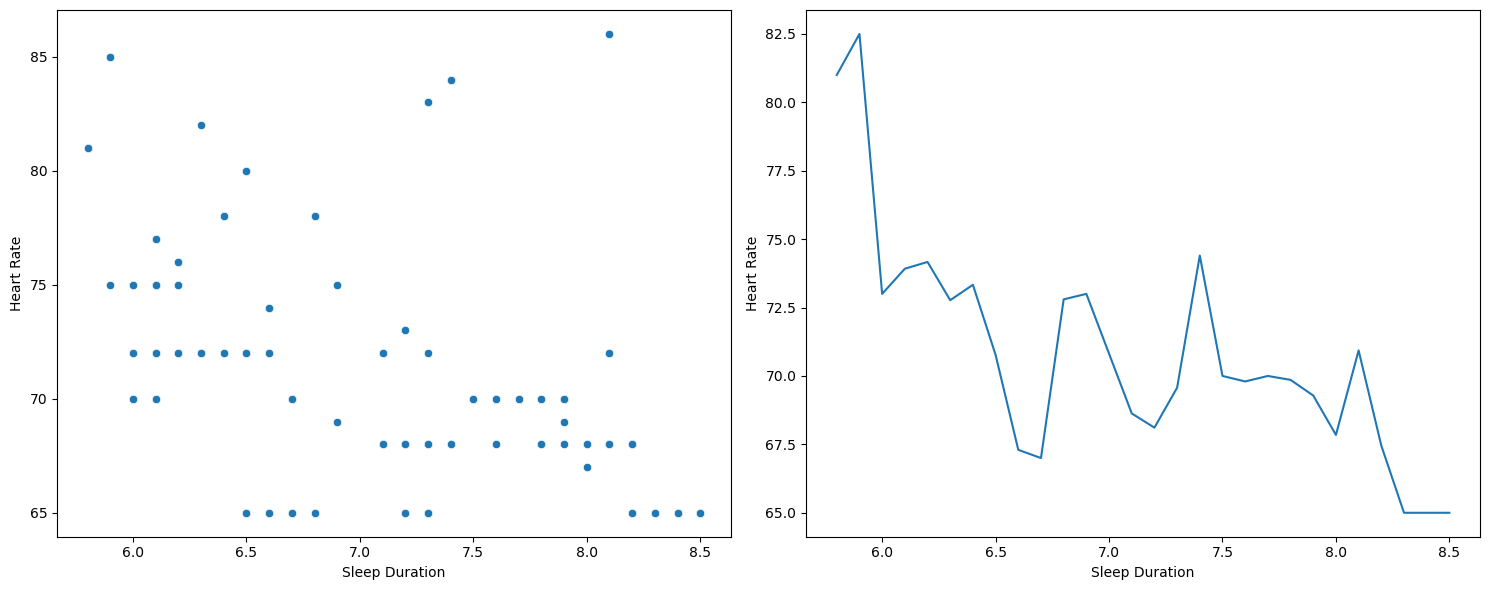

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(data=data, x="Sleep Duration", y="Heart Rate", ax=axes[0])
grouped_data_heart = data.groupby("Sleep Duration")["Heart Rate"].mean().reset_index()
sns.lineplot(data=grouped_data_heart, x="Sleep Duration", y="Heart Rate", ax=axes[1])

plt.tight_layout()



* BMI 범주에 따른 수면 장애 여부를 통계 분석


##### <BMI 범주와 수면 장애 여부>

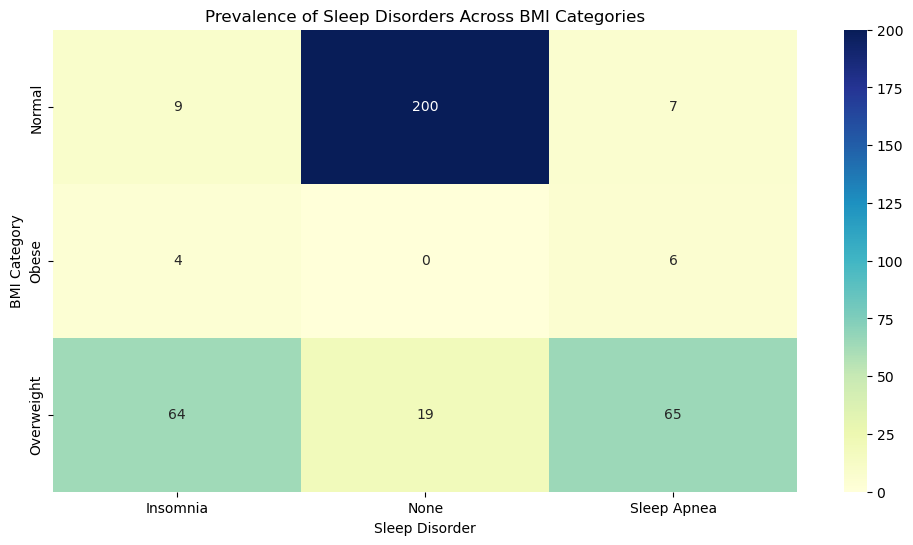

In [7]:
data['BMI Category'] = data['BMI Category'].replace('Normal Weight', 'Normal')
data['Sleep Disorder'].fillna('None', inplace=True)  #None을 생략못하게 하기 위해
bmi_sleep_disorder = data.groupby(['BMI Category', 'Sleep Disorder']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6)) 
sns.heatmap(bmi_sleep_disorder, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Prevalence of Sleep Disorders Across BMI Categories')
plt.ylabel('BMI Category')
plt.xlabel('Sleep Disorder')
plt.show()


### 머신러닝 기법을 사용한 모델 학습 및 모델 평가 수치 계산


* 수면시간 예측


##### <데이터 전처리>

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

X = data.drop('Sleep Duration', axis=1)
y = data['Sleep Duration']

categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

numerical_transformer = SimpleImputer(strategy='mean')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train_transformed = preprocessor.fit_transform(X_train)

X_test_transformed = preprocessor.transform(X_test)

X_train_transformed.shape, X_test_transformed.shape

((299, 50), (75, 50))


##### <모델 평가>

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=0)

model.fit(X_train_transformed, y_train)

y_pred = model.predict(X_test_transformed)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2

(0.044559999999999475, 0.005752399999999985, 0.9908903112647666)